In [16]:
import numpy as np
import torch
from skimage import feature, color, io, draw
from torchvision import datasets, transforms
import plotly.express as px
import matplotlib.pyplot as plt

In [17]:
flowers = datasets.Flowers102("data/flowers", transform=transforms.Resize((224,224)), download=True)

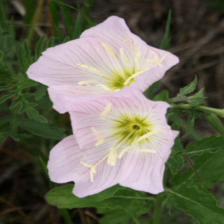

In [18]:
img = flowers[4][0]
img

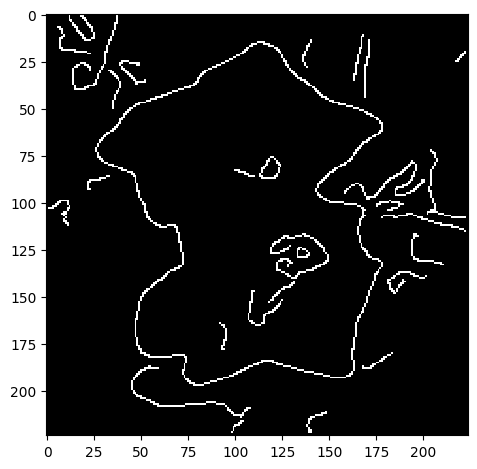

In [19]:
img = color.rgb2gray(img)
feat = feature.canny(img, sigma=2)
io.imshow(feat)

C:\Users\kamil\anaconda3\envs\vit_sampling\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


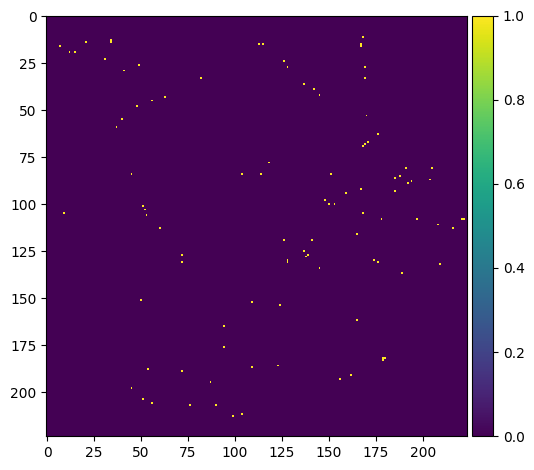

In [20]:
indices = torch.tensor(list(zip(*np.where(feat))), dtype=torch.int)
choice = torch.multinomial(torch.ones(len(indices)), 100)
indices_of_100_points = torch.index_select(indices, dim=0, index=choice)

image = torch.zeros((224, 224))
image[indices_of_100_points[:, 0], indices_of_100_points[:, 1]] = 1
io.imshow(image.numpy())

In [21]:
img_size = 224
patch_size = 32
def generate_patch(index):
    upper_left = torch.maximum(index - patch_size / 2, torch.zeros_like(index))
    lower_right = torch.minimum(index + patch_size / 2, torch.full_like(index, img_size))
    return upper_left, lower_right

In [22]:
patches = generate_patch(indices_of_100_points)
for i in range(100):
    upper_left = patches[0][i]
    lower_right = patches[1][i]
    r, c = draw.rectangle_perimeter(upper_left.numpy(), lower_right.numpy(), shape=img.shape, clip=True)
    image[r, c] = 1

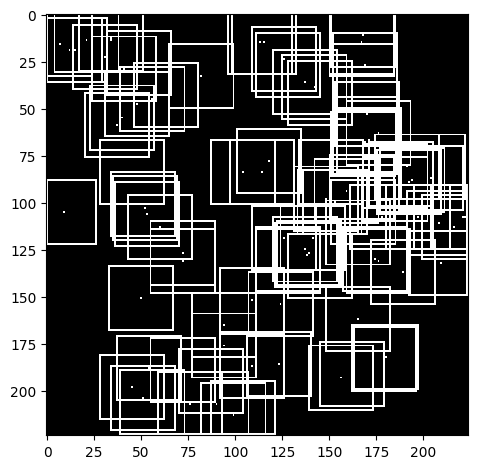

In [23]:
io.imshow(image.numpy())